In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print("Definiendo los simbolos de stock")
symbol_data_to_load = ['D', 'EXC', 'NEE', 'SO', 'DUK']
list_of_df = []

# Ciclo sobre símbolos
# Llenar la lista de DataFrames
print(" --- Inicio de Loop --- ")
for i in symbol_data_to_load:
    print("Procesando Simbolo: " + i)
    temp_df = pd.read_csv(i + '.csv')
    temp_df['Volume_Millions'] = temp_df['Volume'] / 1000000.0
    temp_df['Symbol'] = i  # Agregar nueva columna con el símbolo
    list_of_df.append(temp_df)

print(" --- Completado loop simbolos --- ")
# Combinar en un DataFrame único usando concat
print("Agregando la data")
agg_df = pd.concat(list_of_df, axis=0)

# Agregar estadísticas de retorno y volatilidad
agg_df['VolStat'] = (agg_df['High'] - agg_df['Low']) / agg_df['Open']
agg_df['Return'] = (agg_df['Close'] / agg_df['Open']) - 1.0

print("agg_df DataFrame dimension (filas, columnas): ")
print(agg_df.shape)

print("Head del DataFrame agg_df: ")
agg_df.head()

#print("agg_df['Symbol'].unique()")  


Definiendo los simbolos de stock
 --- Inicio de Loop --- 
Procesando Simbolo: D
Procesando Simbolo: EXC
Procesando Simbolo: NEE
Procesando Simbolo: SO
Procesando Simbolo: DUK
 --- Completado loop simbolos --- 
Agregando la data
agg_df DataFrame dimension (filas, columnas): 
(6295, 11)
Head del DataFrame agg_df: 


,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Millions,Symbol,VolStat,Return
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,1.8064,D,0.018781,0.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,2.2311,D,0.014858,-0.010471
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,2.5889,D,0.032286,-0.014714
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,3.2669,D,0.018505,-0.014425
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,2.6018,D,0.017674,0.003861


In [5]:
# Crear una lista `l` que contiene todas las columnas del DataFrame `agg_df` excepto 'Date', 'Volume' y 'Symbol'
l = [x for x in agg_df.columns if x not in ['Date', 'Volume', 'Symbol']]

# Seleccionar solo las columnas especificadas del DataFrame `agg_df`
agg_df[l]


,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861
...,...,...,...,...,...,...,...,...
1254,88.599998,88.690002,87.839996,88.150002,88.150002,2.1603,0.009594,-0.005079
1255,88.180000,88.239998,87.370003,87.680000,87.680000,3.1418,0.009866,-0.005670
1256,87.949997,87.980003,86.800003,87.180000,87.180000,2.3865,0.013417,-0.008755
1257,86.900002,87.389999,86.169998,86.489998,86.489998,2.6803,0.014039,-0.004718


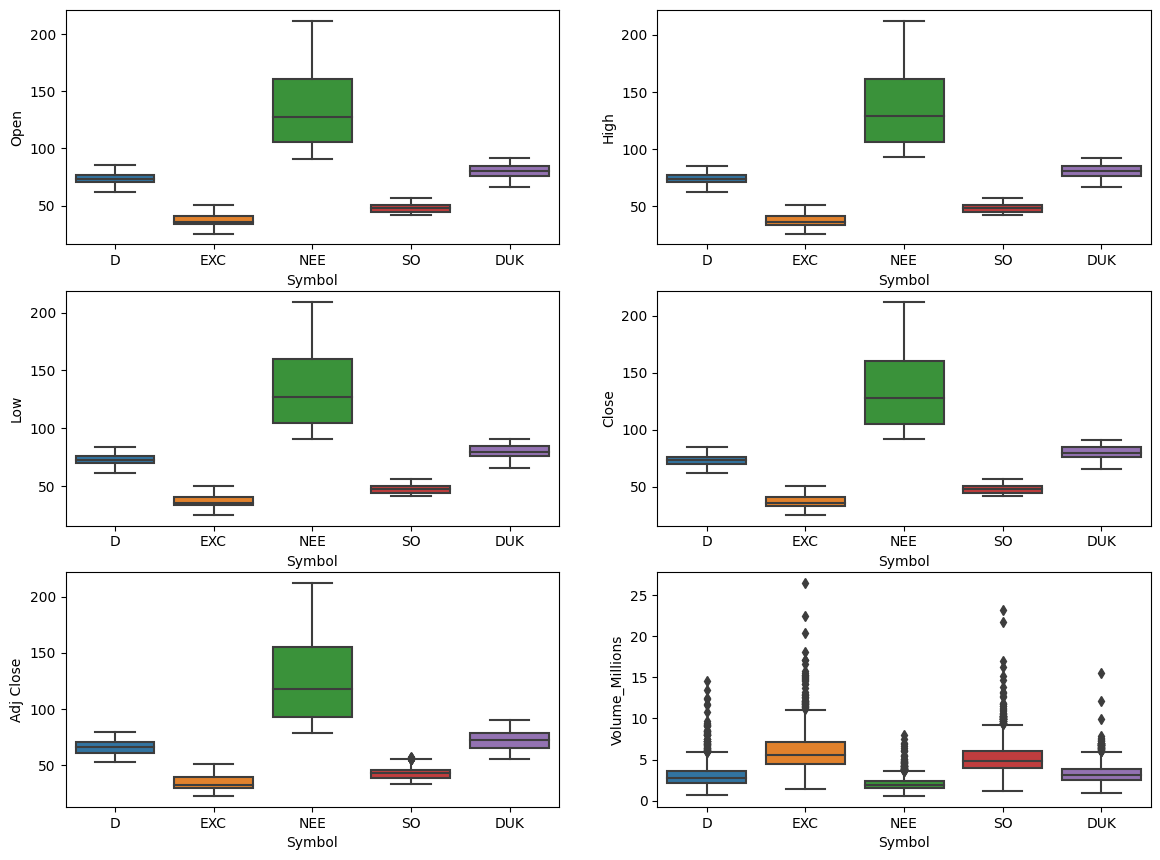

In [6]:
# Seleccionar las columnas de interes 
import matplotlib.pyplot as plt

l=[x for x in agg_df.columns if x not in ['Date','Volume']]
plt.figure(figsize=(14,14))
for x,column in zip(range(8),agg_df[l]):
  if column !='Symbol':
    #print(x)
    if x<=5:
      plt.subplot(4,2,x+1)
      sns.boxplot(data=agg_df[l], y=column, x=agg_df[l]['Symbol'])

In [7]:
l=[x for x in agg_df.columns if x not in ['Date','Volume','Symbol']]
datos= agg_df[l]
datos.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861


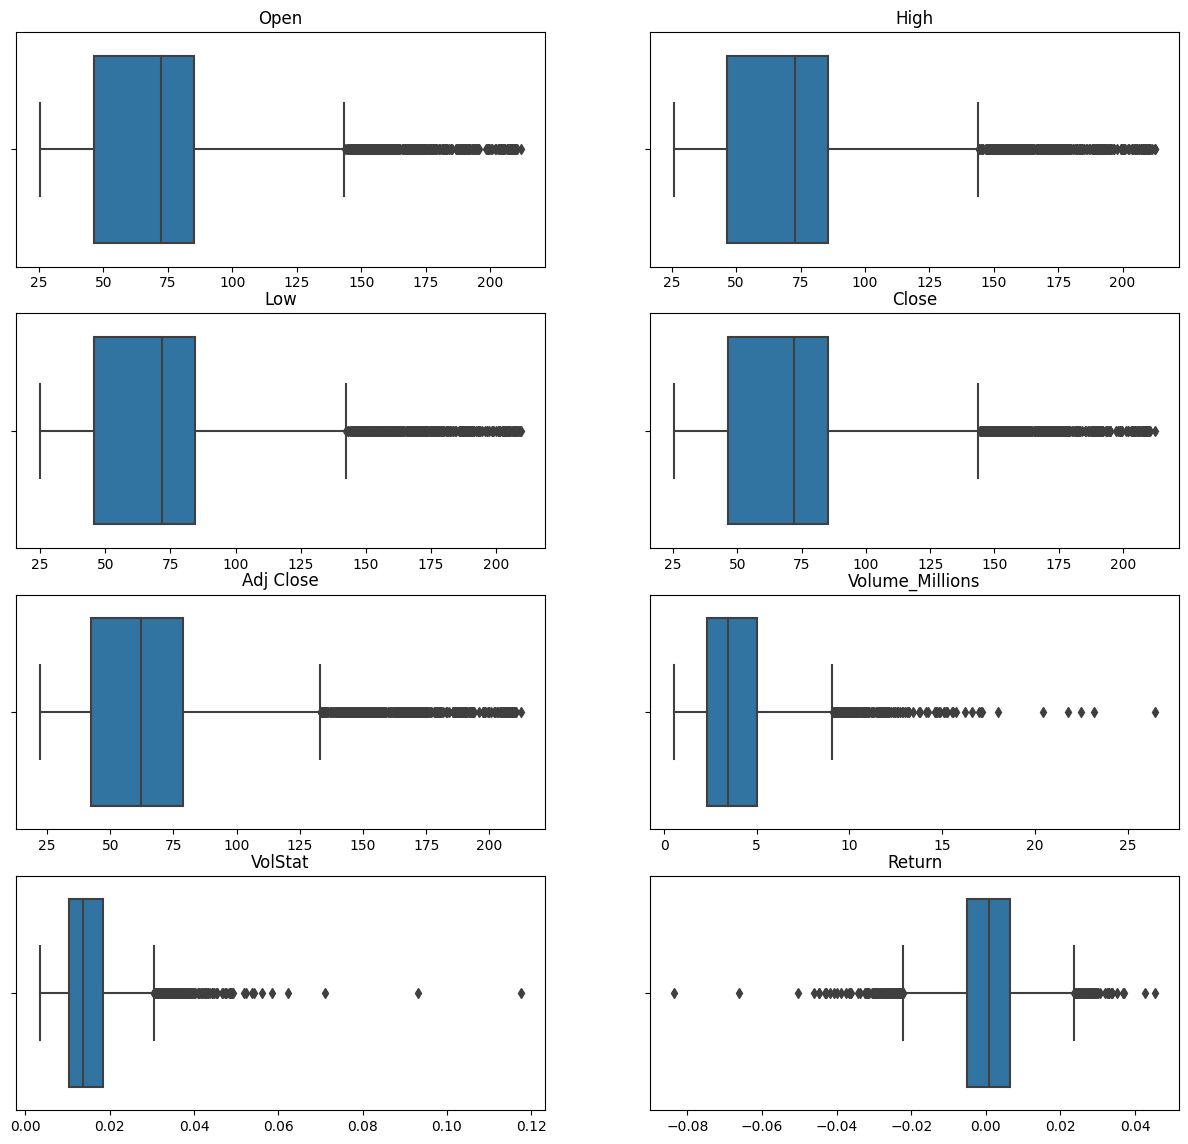

In [8]:
plt.figure(figsize=(15,14))
for i,j in zip(range(8),datos.columns):
  plt.subplot(4,2,i+1)
  sns.boxplot(x=datos[j])
  plt.title(j)
  plt.xlabel('')

In [9]:
# Cargar datos
datos= agg_df[agg_df['Symbol']=='D']
l=[x for x in agg_df.columns if x not in ['Volume','Symbol']]
datos=datos[l]
datos['Date']=pd.to_datetime(datos['Date'])
datos.head()

,Date,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861


In [10]:
# Convertir a z score
datos_z=pd.DataFrame()
for j in datos.columns[1:]:
  datos_z[j] = (datos[j] - datos[j].mean()) / datos[j].std()
datos_z['Fecha']= datos.Date
datos_z.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return,Fecha
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499,2014-07-28
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735,2014-07-29
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938,2014-07-30
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671,2014-07-31
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729,2014-08-01


In [11]:
datos_z['Open_x']= datos_z['Open'].apply(lambda x: 'Atipico' if (x>2 or x<-2) else 'Normal')
datos_z.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return,Fecha,Open_x
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499,2014-07-28,Normal
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735,2014-07-29,Normal
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938,2014-07-30,Normal
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671,2014-07-31,Normal
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729,2014-08-01,Normal


<Axes: xlabel='Fecha', ylabel='Open'>

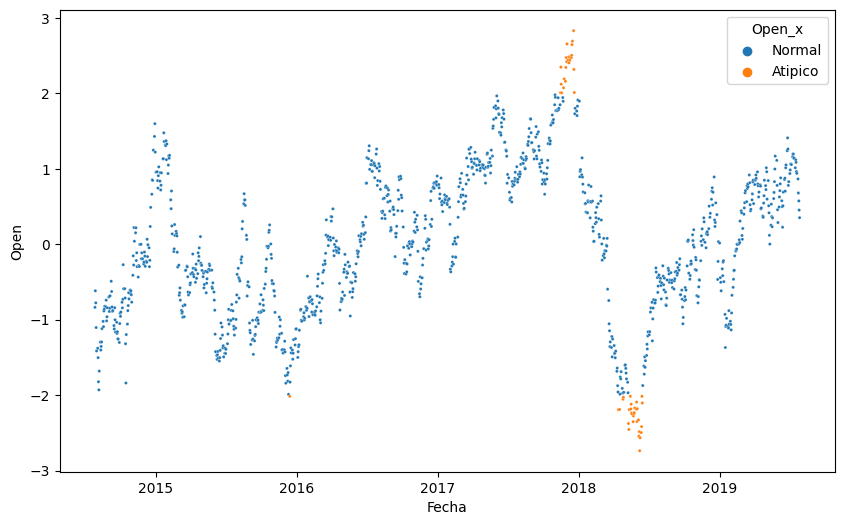

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=datos_z.Fecha, y= datos_z.Open, hue= datos_z['Open_x'],s= 5)

In [13]:
# Extraer columnas de interes
data_multiple=datos_z.drop(columns=['Open_x','Fecha'])
data_multiple.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729


In [15]:
def outlier_euclideano_d(x,cutoff):
  # x: dataframe con valors numericos normalizados 
  result_ = pd.Series([0] * len(x.iloc[:,1]))
  data_mean = x.mean() # media de los datos_
  dist = np.sqrt(np.sum(((x-data_mean) ** 2),axis=1)) #Distancia euclideana 
  dist_mean = dist.mean() #media de las distancia
  dist_zscore = np.abs((dist - dist_mean) / dist.std())#z-score para las distancias
  result_[((dist_zscore > 3))] = 1
  return result_

In [17]:
# Crear una copia de los datos
euc_d = data_multiple.copy()
euc_d.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729


In [18]:
# Aplicar la funcion
euc_d['outlier']=outlier_euclideano_d(euc_d,2)
euc_d.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return,outlier
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499,0
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735,0
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938,0
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671,0
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729,0


<Axes: xlabel='Open', ylabel='VolStat'>

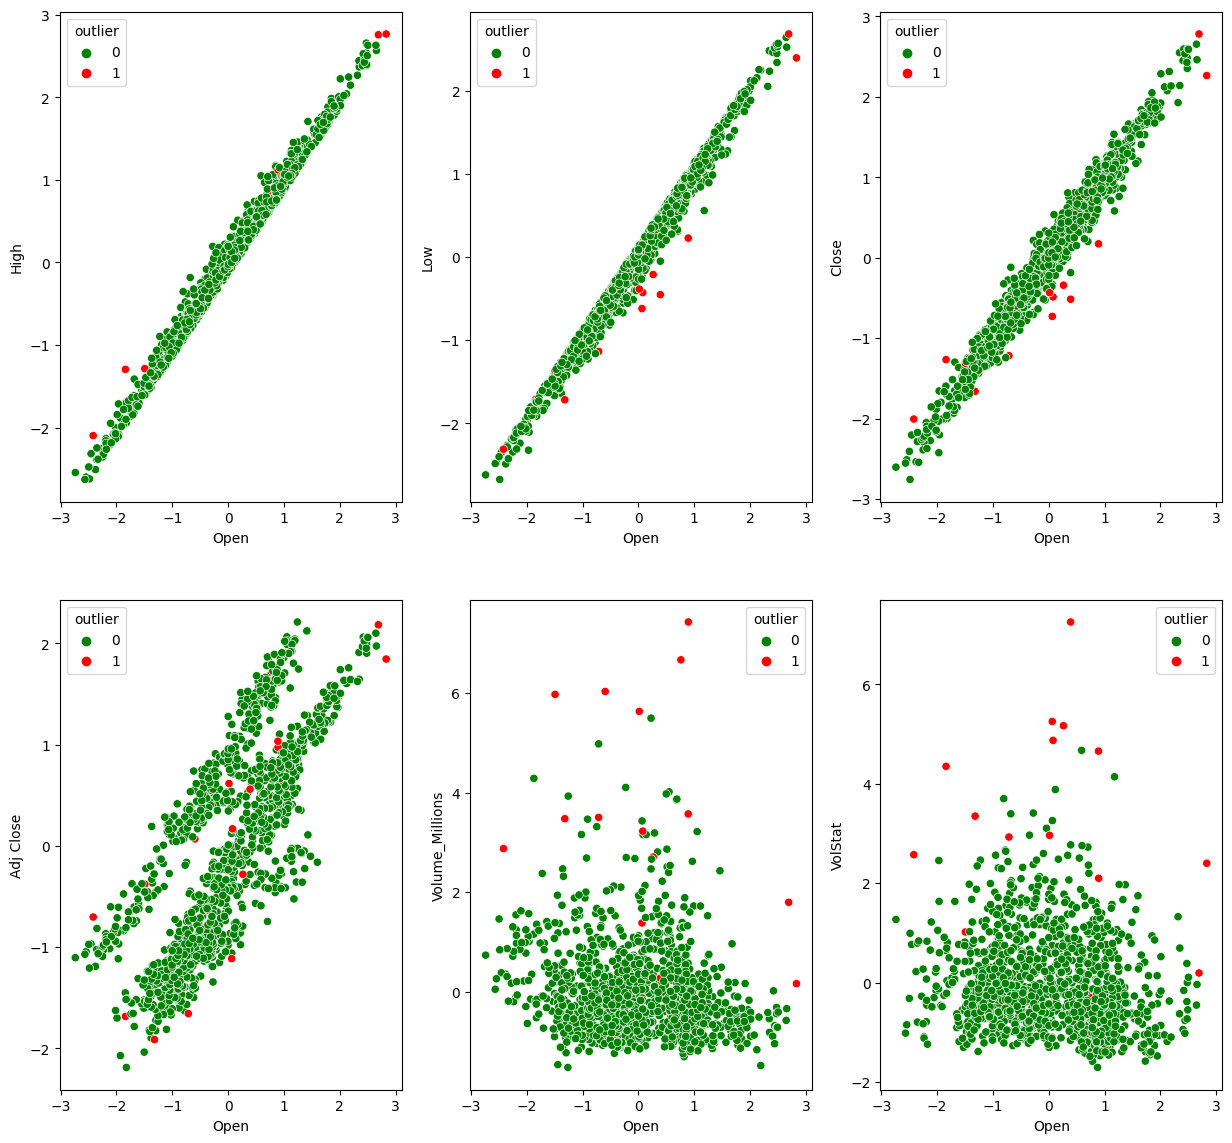

In [19]:
plt.figure(figsize=(15,14))
plt.subplot(2,3,1)
sns.scatterplot(x="Open",y="High",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,2)
sns.scatterplot(x="Open",y="Low",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,3)
sns.scatterplot(x="Open",y="Close",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,4)
sns.scatterplot(x="Open",y="Adj Close",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,5)
sns.scatterplot(x="Open",y="Volume_Millions",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,6)
sns.scatterplot(x="Open",y="VolStat",data=euc_d,hue="outlier",palette=["green","red"])

In [20]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df= pd.read_csv(url,sep=',', header=None)
print(df.shape)
df.replace(0, np.nan, inplace=True)
df.head()

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [21]:
# reemplazar con la mediana
from sklearn.impute import SimpleImputer

valores = df.values #numpy array con los valores
imputador = SimpleImputer(missing_values=np.nan, strategy='median') #definir el imputador
# transformar el dataset
transformados = imputador.fit_transform(valores)
transformados=pd.DataFrame(transformados)
print(transformados.head().round(2))

     0      1     2     3      4     5     6     7    8
0  6.0  148.0  72.0  35.0  125.0  33.6  0.63  50.0  1.0
1  1.0   85.0  66.0  29.0  125.0  26.6  0.35  31.0  1.0
2  8.0  183.0  64.0  29.0  125.0  23.3  0.67  32.0  1.0
3  1.0   89.0  66.0  23.0   94.0  28.1  0.17  21.0  1.0
4  4.0  137.0  40.0  35.0  168.0  43.1  2.29  33.0  1.0


In [22]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df= pd.read_csv(url,sep=',', header=None)
print(df.shape)
df.replace(0, np.nan, inplace=True)
print(df.head().round(2))

(768, 9)
     0      1     2     3      4     5     6   7    8
0  6.0  148.0  72.0  35.0    NaN  33.6  0.63  50  1.0
1  1.0   85.0  66.0  29.0    NaN  26.6  0.35  31  NaN
2  8.0  183.0  64.0   NaN    NaN  23.3  0.67  32  1.0
3  1.0   89.0  66.0  23.0   94.0  28.1  0.17  21  NaN
4  NaN  137.0  40.0  35.0  168.0  43.1  2.29  33  1.0


In [23]:
print(df.interpolate(method="linear").head().round(2))

     0      1     2     3      4     5     6   7    8
0  6.0  148.0  72.0  35.0    NaN  33.6  0.63  50  1.0
1  1.0   85.0  66.0  29.0    NaN  26.6  0.35  31  1.0
2  8.0  183.0  64.0  26.0    NaN  23.3  0.67  32  1.0
3  1.0   89.0  66.0  23.0   94.0  28.1  0.17  21  1.0
4  3.0  137.0  40.0  35.0  168.0  43.1  2.29  33  1.0


In [24]:
print(df.interpolate(method="polynomial",order=2).head().round(2))

      0      1     2      3      4     5     6   7    8
0  6.00  148.0  72.0  35.00    NaN  33.6  0.63  50  1.0
1  1.00   85.0  66.0  29.00    NaN  26.6  0.35  31  1.0
2  8.00  183.0  64.0  22.36    NaN  23.3  0.67  32  1.0
3  1.00   89.0  66.0  23.00   94.0  28.1  0.17  21  1.0
4  1.96  137.0  40.0  35.00  168.0  43.1  2.29  33  1.0


In [25]:
df.interpolate(method='nearest',)

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,1.0
2,8.0,183.0,64.0,29.0,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,1.0
4,1.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,1.0
764,2.0,122.0,70.0,27.0,180.0,36.8,0.340,27,1.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,1.0
766,1.0,126.0,60.0,23.0,NaN,30.1,0.349,47,1.0


In [28]:
import pandas as pd
from sklearn import datasets
import datawig as dt

# Seleccionar el DataFrame de entrenamiento y prueba (df_train y df_test)
df_train, df_test = datawig.utils.random_split(df)

# Inicializar el modelo SimpleImputer
imputer = dt.SimpleImputer(
    input_columns=['Col0', 'Col1', 'Col2'],  # Columnas que contienen información para la imputación
    output_column='Col4',  # Columna que deseamos imputar
    output_path='imputer_model'  # Ruta para guardar el modelo y las métricas
)


ModuleNotFoundError: No module named 'datawig'

In [38]:
# Entrenar el modelo con data de entrenamiento y 50 epocas 
imputer.fit(train_df=df_train, num_epochs=50)

# Imputar los missing values y devolver el dataframe original con la predicciones
imputed = imputer.predict(df_test)


NameError: name 'imputer' is not defined

In [ ]:
imputed

In [ ]:
print(imputed.head(20).round(2))